In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [12]:
auto_insurance = pd.read_csv("https://query.data.world/s/4l35zxppjcnka5x35bwt4wjphssmpm",
                             index_col=False,
                             names=['claims', 'price_of_insurance'])

In [13]:
auto_insurance.head()

,claims,price_of_insurance
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


Text(0, 0.5, 'Price of insurance in $')

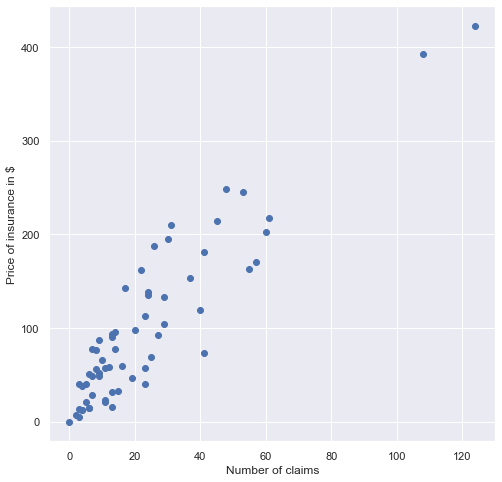

In [16]:
# Ploting data
sns.set()
plt.figure(figsize=(8,8))
plt.scatter(auto_insurance["claims"], auto_insurance["price_of_insurance"])
plt.xlabel("Number of claims")
plt.ylabel("Price of insurance in $")

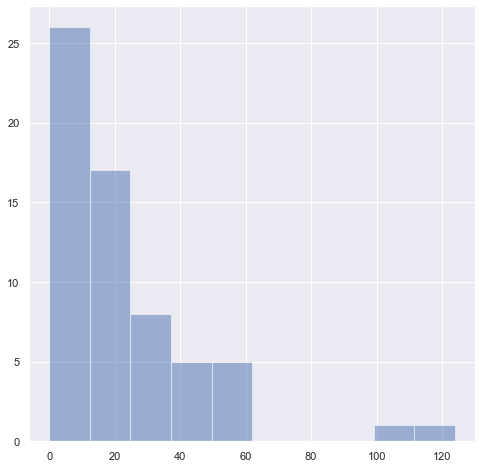

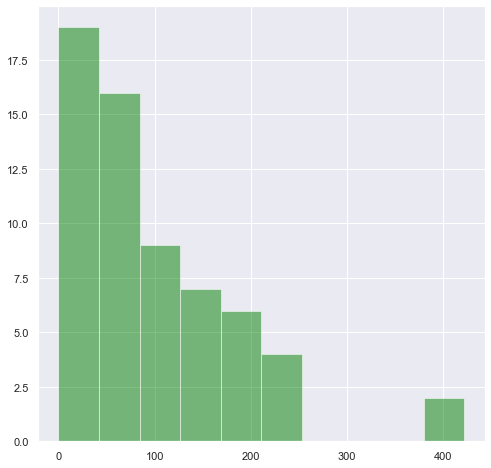

In [24]:
# Histograms
plt.figure(figsize=(8,8))
plt.hist(auto_insurance["claims"], alpha=0.5)
plt.show()

plt.figure(figsize=(8,8))
plt.hist(auto_insurance["price_of_insurance"], alpha=0.5, color="green")
plt.show()

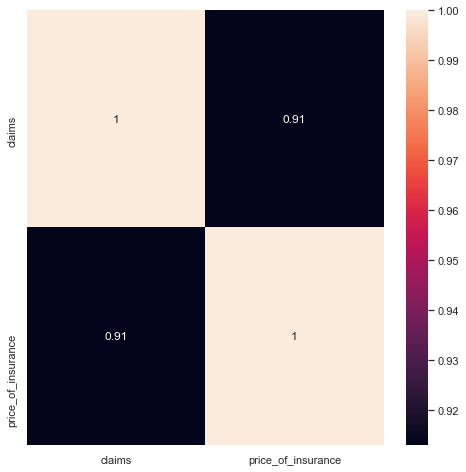

In [31]:
# Correlation matrix
corr_Matrix = auto_insurance[['claims', 'price_of_insurance']].corr()

plt.figure(figsize=(8,8))
sns.heatmap(corr_Matrix, annot=True)
plt.show()

In [68]:
# Atributes and labels
X = auto_insurance["claims"].values.reshape(-1,1)
y = auto_insurance["price_of_insurance"].values.reshape(-1,1)

In [69]:
# Training data - fitting regression line
regressor = LinearRegression()  
regressor.fit(X, y)

print("Intercept: ", regressor.intercept_)
print("Slope: ", regressor.coef_)

Intercept:  [19.99448576]
Slope:  [[3.41382356]]


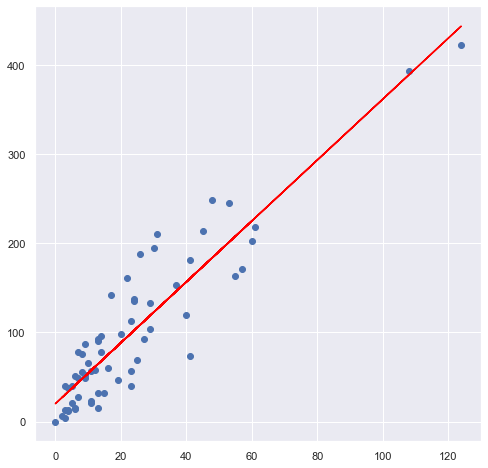

In [84]:
# Linear regression
plt.figure(figsize=(8, 8))
plt.scatter(X,y)
plt.plot(X, regressor.coef_*X + regressor.intercept_, color="red")
# plt.ylabel("Price of insurance")
# plt.xlabel("Number of claims")
# plt.show()

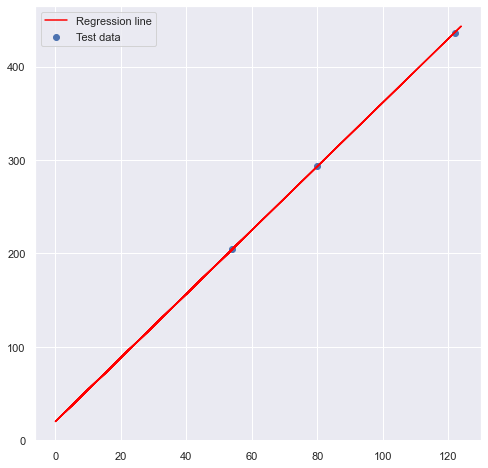

In [83]:
# Predicting price of insurance

x_test = np.array([80, 122, 54]).reshape(-1,1)
y_pred = regressor.predict(x_test)

plt.figure(figsize=(8,8))
plt.scatter(x_test, y_pred, label="Test data")
plt.plot(X, regressor.predict(X), color='red', label="Regression line")
plt.legend()
